In [ ]:
# ! git clone https://github.com/masashitsubaki/molecularGNN_smiles.git
# ! wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
! chmod +x Miniconda3-latest-Linux-x86_64.sh
! bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
! conda install -q -y -c conda-forge rdkit

In [28]:
import matplotlib.pyplot as plt
import sys
import os

sys.path.append('/usr/local/lib/python3.7/site-packages/')
 
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool, cv
from tqdm import tqdm
# from sklearn.ensemble import RandomForestRegressor
# from boruta import BorutaPy

%matplotlib inline

In [4]:
model_ki = CatBoostRegressor() 
model_ki.load_model('../models/ki_thrombin_catboost_reg_mae_0.277_0.509')
model_ki.get_params()

{'loss_function': 'MAE',
 'task_type': 'GPU',
 'od_wait': 500,
 'learning_rate': 0.1,
 'l2_leaf_reg': 3,
 'iterations': 20000,
 'verbose': 1}

In [5]:
data_df = pd.read_csv('../data/2020-06_Enamine_screening_compounds_in-stock_SMILES.smiles', usecols=[0], sep='\s+')
data_df.shape

(2761292, 1)

In [9]:
def make_inference(row):
    try:
        m = Chem.MolFromSmiles(row)
        fp = AllChem.GetMorganFingerprintAsBitVect(m,2,invariants=[1]*m.GetNumAtoms())
        array = np.zeros((0, ), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, array)
        pred = 10**model_ki.predict(array)
#         results.write("{}, {}\n".format(row, pred))
        # results.flush()
        return pred
    except Exception as e:
#         results.write("{}, NaN\n".format(row))
        # error_smiles.add(row)
        print(e)
        return np.nan

In [17]:
%%time

with open('../inference/2020-06_Enamine_screening_compounds_in-stock_SMILES.catboost.ki', 'w') as results:
    for index, row in tqdm(data_df.iterrows()):
        pred = make_inference(row.smiles)
        results.write("{}, {}\n".format(row.smiles, pred))

2595558it [6:48:20, 83.86it/s] RDKit ERROR: [20:09:23] Explicit valence for atom # 9 N, 4, is greater than permitted
2595569it [6:48:20, 88.59it/s]RDKit ERROR: [20:09:23] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:09:23] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:09:23] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:09:23] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:09:23] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:09:23] Explicit valence for atom # 11 N, 4, is greater than permitted
2595583it [6:48:20, 97.81it/s]

'NoneType' object has no attribute 'GetNumAtoms'
'NoneType' object has no attribute 'GetNumAtoms'
'NoneType' object has no attribute 'GetNumAtoms'
'NoneType' object has no attribute 'GetNumAtoms'
'NoneType' object has no attribute 'GetNumAtoms'
'NoneType' object has no attribute 'GetNumAtoms'
'NoneType' object has no attribute 'GetNumAtoms'


2609475it [6:51:17, 83.12it/s]RDKit ERROR: [20:12:21] Explicit valence for atom # 7 N, 4, is greater than permitted
2609493it [6:51:17, 78.51it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2611974it [6:51:49, 80.41it/s]RDKit ERROR: [20:12:52] Explicit valence for atom # 10 N, 4, is greater than permitted
2611995it [6:51:49, 88.01it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2624019it [6:54:22, 86.57it/s]RDKit ERROR: [20:15:26] Explicit valence for atom # 7 N, 4, is greater than permitted
2624037it [6:54:23, 75.61it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2633106it [6:56:16, 82.06it/s]RDKit ERROR: [20:17:20] Explicit valence for atom # 7 N, 4, is greater than permitted
2633116it [6:56:16, 86.43it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2633786it [6:56:25, 91.40it/s]RDKit ERROR: [20:17:28] Explicit valence for atom # 11 N, 4, is greater than permitted
2633807it [6:56:25, 93.90it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2636767it [6:57:03, 73.71it/s]RDKit ERROR: [20:18:06] Explicit valence for atom # 11 N, 4, is greater than permitted
2636783it [6:57:03, 70.77it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2639202it [6:57:34, 82.69it/s]RDKit ERROR: [20:18:38] Explicit valence for atom # 8 N, 4, is greater than permitted
2639222it [6:57:34, 87.31it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2640623it [6:57:54, 64.97it/s]RDKit ERROR: [20:18:57] Explicit valence for atom # 9 N, 4, is greater than permitted
2640638it [6:57:54, 66.45it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2647243it [6:59:17, 84.69it/s]RDKit ERROR: [20:20:20] Explicit valence for atom # 7 N, 4, is greater than permitted
2647263it [6:59:17, 89.26it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2649187it [6:59:42, 66.47it/s]RDKit ERROR: [20:20:45] Explicit valence for atom # 6 N, 4, is greater than permitted
2649195it [6:59:42, 68.20it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2649993it [6:59:52, 83.07it/s]RDKit ERROR: [20:20:55] Explicit valence for atom # 12 N, 4, is greater than permitted
2650013it [6:59:52, 86.56it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2650904it [7:00:03, 68.23it/s]RDKit ERROR: [20:21:06] Explicit valence for atom # 12 N, 4, is greater than permitted
2650920it [7:00:03, 69.26it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2708873it [7:12:19, 63.98it/s]RDKit ERROR: [20:33:22] Explicit valence for atom # 6 N, 4, is greater than permitted
2708889it [7:12:19, 70.35it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2710041it [7:12:34, 89.98it/s]RDKit ERROR: [20:33:37] Explicit valence for atom # 28 N, 4, is greater than permitted
2710051it [7:12:34, 84.36it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2712027it [7:12:59, 84.41it/s]RDKit ERROR: [20:34:03] Explicit valence for atom # 5 N, 4, is greater than permitted
2712047it [7:13:00, 88.55it/s]

'NoneType' object has no attribute 'GetNumAtoms'


2761281it [7:23:23, 85.22it/s]RDKit ERROR: [20:44:26] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
2761292it [7:23:23, 103.79it/s]

'NoneType' object has no attribute 'GetNumAtoms'
CPU times: user 11h 3min 43s, sys: 1h 28min 16s, total: 12h 32min
Wall time: 7h 23min 23s


# Results analysis

In [5]:
results_df = pd.read_csv('../inference/2020-06_Enamine_screening_compounds_in-stock_SMILES.catboost.ki',
                         header=None,
                         low_memory=False,
                         names=['SMILES', 'Ki (nM)'])

In [12]:
results_df.head()

SMILES              Ki (nM)
0               CCC1(NC(=O)N(Cc2ccccc2)C1=O)c1ccccc1   1336.1150777921919
1        O=C(CSc1nnc(-c2cccs2)n1Cc1ccccc1)NCc1ccccc1    982.6326392205731
2                              CSc1nc2nc(C)cc(C)n2n1    3001.299025790255
3                           Cc1cc(C)n2nc(SCC#N)nc2n1    83.89636850106943
4  FC(F)(F)c1cc(Cl)c(=O)n(CC(=O)N(Cc2ccccc2)Cc2cc...    583.5832811397445

In [9]:
results_df = results_df.dropna()

In [13]:
results_df.dtypes

SMILES     object
Ki (nM)    object
dtype: object

In [14]:
results_df['Ki (nM)'] = results_df['Ki (nM)'].astype(float)

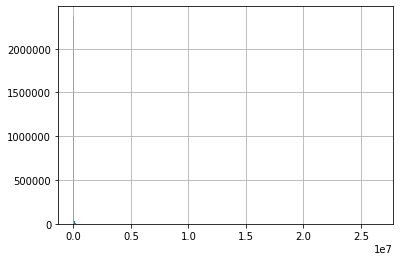

In [18]:
results_df['Ki (nM)'].hist(bins=1000)

In [23]:
results_df['Ki (nM)'].describe()

count    2.761269e+06
mean     1.951994e+04
std      9.908496e+04
min      3.791514e-03
25%      9.644817e+02
50%      3.888717e+03
75%      1.337775e+04
max      2.645886e+07
Name: Ki (nM), dtype: float64

# Select top 100 ligands

In [19]:
top100 = results_df.nsmallest(100, 'Ki (nM)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2797eb1710>]],
      dtype=object)

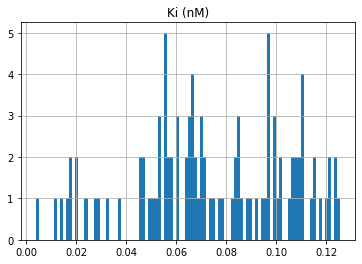

In [20]:
top100.hist(bins=100)

In [21]:
top100.head(50)

SMILES   Ki (nM)
1577946  CC(C)N(CCC#N)Cn1nc(-c2ccc(Cl)cc2)n(Cc2ccccc2)c1=S  0.003792
2133314  CC(C)N(Cc1ccc(cc1)N(C)C)Cn1nc(-c2ccccc2Cl)n(C)...  0.011575
217708   CC(C)N(C(=O)CN1C(=O)N(C2CCCC2)C(=O)C1=O)c1ccc(...  0.014728
992773   Clc1ccc(cc1)-c1nn(CN2CCC3(CC2)OCCO3)c(=S)n1Cc1...  0.016003
696503         CC(C)N(Cc1ccc(cc1)N(C)C)Cn1nc(C)n(CC=C)c1=S  0.017277
830293       CC(C)C(CNC(=O)CCc1c(C)nc2cc(C)nn2c1C)N1CCOCC1  0.018041
1652790           CC(C)N(Cc1cc2CCCc2s1)Cc1nc(N)nc(n1)N(C)C  0.019668
1585633  NS(=O)(=O)CC1CCCN(C1)C(=O)C1CCCN1C(=O)c1cc(Cl)...  0.019903
1883368  Cn1c(CNC(=O)C2CC3CCCCC3N2C(=O)c2cccc(Cl)c2)nc2...  0.023307
294573   Cc1cccc(NC(=O)C2CCCN(Cn3nc(-c4ccco4)n(Cc4ccccc...  0.027612
2081839  CCN(CC)S(=O)(=O)c1ccc2n(C)c(CCC(=O)OCC(=O)NC3C...  0.029142
1705047  Cc1cc(on1)C1CCCN1Cn1nc(-c2ccc(Cl)cc2)n(Cc2cccc...  0.031845
737156        COCCn1c(nn(CN(Cc2ccccc2)C(C)C)c1=S)-c1ccncc1  0.036879
2057191  CC1CCCC(NC(=O)CSc2nnc(-c3ccc(cc3)C(C)(C)C)n2-c...  0.045182
2081487  CC(C)N(CC(=O)Nc1cccc(c1)S(=O)(=O)N=C1CCCCCN1)C...  0.045735
382562          CC1CCCC(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2N)C1C  0.046694
2001727        CC1CCCC(NC(=O)CSc2nnc(-c3ccc(Cl)cc3)n2C)C1C  0.046694
151909       CC1CCCC(NC(=O)CSc2nnc(-c3ccc(Cl)cc3Cl)n2N)C1C  0.049881
2133381  COCCCn1c2nn(CN(Cc3ccc(cc3)N(C)C)C(C)C)c(=S)n2c...  0.050239
2206204  Cc1c(NC(=NS(=O)(=O)c2cc(ccc2Cl)[N+]([O-])=O)c2...  0.051372
736350   CC1CCN(Cn2nc(Cc3cccc4ccccc34)n(-c3ccc(C)cc3C)c...  0.052692
2066718            Cc1ccc2n(C)c(CNC(=O)N3CCC[C@H]3CO)nc2c1  0.052993
2575871                CCC1OCCCC1C(=O)NCCc1nc2cc(F)ccc2n1C  0.052993
1882533  CCn1c(SCC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)nnc1-...  0.055040
2691293      CCc1nnc(o1)[C@H]1CCCN(Cc2ccc(cc2F)C#N)[C@H]1C  0.055092
2692001     CCc1nnc(o1)[C@H]1CCCN(Cc2ccc(cc2Cl)C#N)[C@H]1C  0.055092
2561358            CC(C)[C@H]1OCC[C@@H]1CNCc1ccnc(n1)N(C)C  0.055727
1535236  CC(C)N(Cc1nnc(o1)-c1ccccc1)Cn1nc(C2CC2)n(Cc2cc...  0.055939
2045747  CC1CCCC(NC(=O)CSc2nc3ccccc3c(=O)n2-c2ccc(F)cc2...  0.056638
2057301  CC1CCCC(NC(=O)CSc2nnc(-c3ccc(cc3)C(C)(C)C)n2C)C1C  0.056766
2059752  CC1CCCC(NC(=O)CSc2nnc(-c3cccc(C)c3)n2-c2ccc(Cl...  0.057470
2078680            CC1CCCC(NC(=O)CSc2nnnn2-c2ccc(O)cc2)C1C  0.057868
173682     COCCCn1c(SCC(=O)NC2CCCC(C)C2C)nnc1-c1ccc(Cl)cc1  0.059852
911955   CCN1CCC(CC1)N(C)C(=O)C1CC2CCCCC2N1C(=O)c1sc2cc...  0.060353
1561953  CCCCn1c(nn(CCC(=O)Nc2c(C)cccc2CC)c1=S)-c1ccc(C...  0.060599
479257             CC1CCCC(NC(=O)CSc2nnnn2-c2cccc(C)c2)C1C  0.064160
2660383  CCn1c(nn(Cc2nc(no2)C(C)OC)c1=O)[C@H]1OCC[C@H]1...  0.064556
735569         Brc1ccc(o1)-c1nn(CN2CCOCC2)c(=S)n1Cc1ccccc1  0.065697
1637848        Clc1ccc(cc1)-c1nn(CN2CCOCC2)c(=S)n1Cc1ccco1  0.065697
1637849         Cc1cccc(c1)-c1nn(CN2CCOCC2)c(=S)n1Cc1ccco1  0.065697
2691983      C[C@H]1[C@H](CCCN1Cc1ccc(cc1Cl)C#N)c1nnc(C)o1  0.066744
2059042  CC1CCCC(NC(=O)CSc2nnc(-c3ccc(Cl)cc3)n2-c2ccc(C...  0.066761
2144751  CN1CCN(Cn2nc(-c3cccc(c3)S(=O)(=O)N3CCOCC3)n(Cc...  0.066781
2144802  CC1CCN(Cn2nc(-c3cccc(c3)S(=O)(=O)N3CCOCC3)n(Cc...  0.066781
1869021  CC(C)N(Cc1ccccc1)C(=O)CN1C(=O)N(C2CCCC2)C(=O)C1=O  0.068149
545467                CC(C)N(Cc1cnn(C)c1)Cn1nc2CCCCCn2c1=S  0.068257
2056384  COc1ccc(OC)c(c1)-n1c(SCC(=O)Nc2c(C)n(C)n(-c3cc...  0.069465
2046553  CC1CCCC(NC(=O)CSc2nnc(-c3ccccc3)n2-c2ccc(F)cc2...  0.070228
501438   CC1CCCC(NC(=O)CSc2ncc(-c3ccc(Cl)cc3)n2-c2ccccc...  0.070451
246401   Cc1cc(C)n(n1)-c1cccc(NC(=O)NCCCn2nc3CCCCn3c2=O)c1  0.070466

In [22]:
top100.to_csv('../inference/2020-06_Enamine_screening_compounds_in-stock_SMILES.catboost.ki.top100',
              index=None)

# 100 largest

In [24]:
top100largest = results_df.nlargest(100, 'Ki (nM)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2798a4a810>]],
      dtype=object)

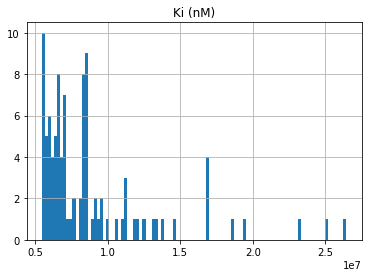

In [25]:
top100largest.hist(bins=100)

In [26]:
top100largest.head(50)

SMILES       Ki (nM)
356773   CCOC(=O)C1=C(C)NC(C)=C(C1C(=O)OCC(=O)NC(CC)CC)...  2.645886e+07
790288      CCOC(=O)N1CCN(CC2=C(C(CC)NC(=O)N2)C(=O)OCC)CC1  2.509264e+07
1407933  CC(OC(=O)c1sc2ncn(C)c(=O)c2c1C)C(=O)c1ccc2N(CC...  2.329732e+07
1029203              CCOC(=O)C1=C(CSC(=S)N(CC)CC)NC(=O)NC1  1.944314e+07
427945   COc1ccc2c(COC(=O)c3ccc(CNC(=O)OC(C)(C)C)cc3)cc...  1.856049e+07
46875                      CCCCC(=O)N1CCC2(CC1)NC(=O)NC2=O  1.698184e+07
1480193                  CCCCSCC(=O)N1CCC2(CC1)NC(=O)NC2=O  1.698184e+07
1608817                   CCCCCC(=O)N1CCC2(CC1)NC(=O)NC2=O  1.698184e+07
1620464                 CCCCCCCC(=O)N1CCC2(CC1)NC(=O)NC2=O  1.698184e+07
1814827  CN(C(=O)CN1CCc2n[nH]c(=O)cc2C1)c1ccccc1C(=O)NC...  1.465955e+07
325370                        CCNC(=O)NC(=O)C(C)SCC(=O)OCC  1.376141e+07
1561978       COc1ccc2oc(=O)c(cc2c1)C(=O)NC(C)(C)CC(C)(C)C  1.328456e+07
111494                                CCOC(=O)CC(=O)C(C)OC  1.321995e+07
425661   COc1ccc2c(COC(=O)c3ccccc3N(C)C(=O)c3cccs3)cc(=...  1.254856e+07
285250         CCOC(=O)C1=C(COC(=O)C2CC2(Cl)Cl)NC(=O)NC1CC  1.203977e+07
1506871           CCNC(=O)NC(=O)CN1CCC(CC1)C(=O)NCC(F)(F)F  1.186187e+07
1249049  CCOC(=O)C1=C(CN2CCC(CC2)C(=O)NCC(F)(F)F)NC(=O)NC1  1.119531e+07
1522693                O=C(CC1CCCC1)N1CCC2(CC1)NC(=O)NC2=O  1.114130e+07
1522866               O=C(CC1CCCCC1)N1CCC2(CC1)NC(=O)NC2=O  1.114130e+07
433738           CCCNC(=O)C1(CCCCC1)NC(=O)C1CCN(CC1)C(C)=O  1.094372e+07
212310                   CCOC(=O)C1=C(CN(CC)CC)NC(=O)NC1CC  1.067591e+07
525061            CCCC(=O)N1CCC(CC1)C(=O)NC1(CCCCC1)C(O)=O  9.945911e+06
2760501           CCCCN(C(=O)NC(=O)ON=C1CCCCCN1)S(C)(=O)=O  9.640546e+06
1670498          CCCCNC(=O)NC(=O)CN1CCCN(CC(=O)N(CC)CC)CC1  9.619024e+06
359294   CCNC(=O)COC(=O)C1C(C(=O)OCC)=C(C)NC(C)=C1C(=O)OCC  9.262338e+06
1669418     COc1ccc2oc(C(=O)NC3CCc4nnc(C(C)C)n4C3)c(C)c2c1  9.225391e+06
2001794       CCOC(=O)C1=C(COC(=O)C2=NNC(=O)CC2)NC(=O)NC1C  9.065192e+06
2251698              CN(Cc1nccn1C(F)F)C(=O)c1sc2ccccc2c1Cl  8.865714e+06
1271052  O=C(COc1ccccc1C(=O)Nc1ccccc1)N1CCN(CC1)S(=O)(=...  8.580291e+06
111017                             COCC(=O)NC1CCC(=O)NC1=O  8.572865e+06
825761           O=C(CC1NC(=O)NC1=O)N1CCC2(CC1)NC(=O)NC2=O  8.553221e+06
825865                 O=C(COCC1CC1)N1CCC2(CC1)NC(=O)NC2=O  8.519717e+06
1577112               O=C(CCC1CCCC1)N1CCC2(CC1)NC(=O)NC2=O  8.519717e+06
2287973             O=C(CCCC1CCCCC1)N1CCC2(CC1)NC(=O)NC2=O  8.519717e+06
2297968              O=C(CCC1CCCCC1)N1CCC2(CC1)NC(=O)NC2=O  8.519717e+06
77219                 CC(C)(C)OC(=O)N1CCC2(CC1)NC(=O)NC2=O  8.482680e+06
1864926               CC(C)(C)CC(=O)N1CCC2(CC1)NC(=O)NC2=O  8.482680e+06
965568                   CCOc1cc(OCC)c2c(C)c(Cl)c(=O)oc2c1  8.309749e+06
53775                                    CCCC1CCC(=O)NC1=O  8.302571e+06
61206                              CCOC(OCC)C(=O)CC(=O)OCC  8.302571e+06
74266                                  CCOC(=O)CC(=O)C1CC1  8.302571e+06
78646                                  CCCC(=O)CC(=O)C1CC1  8.302571e+06
1790597              CCNC(=O)C1(CCCC1)NC(=O)C1CCC(F)(F)CC1  8.280802e+06
1790611              CCNC(=O)C1(CCCC1)NC(=O)C1CCC(C)(C)CC1  8.280802e+06
65143                  COCC1(CCN(CC1)C(=O)OC(C)(C)C)C(O)=O  8.259518e+06
923454               O=C(CN1CSCC1=O)N1CCC2(CC1)NC(=O)NC2=O  8.169363e+06
193740       CCOC(=O)C1=C(COC(=O)c2oc3ccccc3c2C)NC(=O)NC1C  8.100082e+06
110893               CC(C)(C)OC(=O)N1CCC(CCC=C)(CC1)C(O)=O  7.725112e+06
1221348   CN(C(=O)CSc1nnc(C2CC2)n1C)c1ccccc1C(=O)NCc1ccco1  7.611221e+06
1269073                CCNC(=O)C1(CCCCC1)NC(=O)CCN1CCOC1=O  7.546575e+06

In [27]:
top100largest.to_csv('../inference/2020-06_Enamine_screening_compounds_in-stock_SMILES.catboost.ki.top100largest',
              index=None)